In [1]:
import sys
import pandas as pd
import matplotlib as plt
import sys,math,codecs,time

from matplotlib.pyplot import *


In [23]:
texts = codecs.open('../data/language/wikipedia-linguisticLaws.csv',"r","unicode_escape")
texto=texts.read()
lines=texto.split("\n")


wf=[]
f=[]
for line in lines:
    es=line.split("\t")
    try:
        wf.append((int(es[1]),es[0]))
        f.append((int(es[1])))
    except:
        print(line)
f.sort()
wf.sort()
f.reverse()
wf.reverse()    

In [25]:
size=0
for w in wf[:10]:
    size=size+w[0]
print(size,len(wf))

320262661 3674206


Single books

In [2]:
def tokenType(book="sawyerC"):
    texts = codecs.open('../data/language/'+book+'.txt',"r","utf-8")
    text=texts.read()
    words=text.split(" ")

    return(len(words),len(set(words)))

In [3]:
books=["aliceC","sawyerC","prideC","missisipiC","jungleC","beagleC","mobyC","ulyssesC","quixoteC","wrnpcC"]

In [4]:
data=[]
for b in books:
    tt=tokenType(b)
    print(b,tt)
    data.append(tt)

aliceC (26667, 2630)
sawyerC (71181, 7325)
prideC (122195, 6413)
missisipiC (146787, 12250)
jungleC (151301, 10106)
beagleC (208376, 12670)
mobyC (215940, 17549)
ulyssesC (265305, 29987)
quixoteC (402965, 14877)
wrnpcC (565162, 18063)


In [6]:
data.append((320262661,3674206))

In [7]:
def tokenTypeC(book="sawyerC"):
    texts = codecs.open('../data/language/'+book+'.txt',"r","utf-8")
    text=texts.read()
    words=text.split(" ")
    
    xs=[]
    ys=[]
    i=1
    while i<len(words):
        xs.append(i)
        ys.append(len(set(words[:i])))
        i=i*2 
    xs.append(len(words))
    ys.append(len(set(words)))
    return(xs,ys)

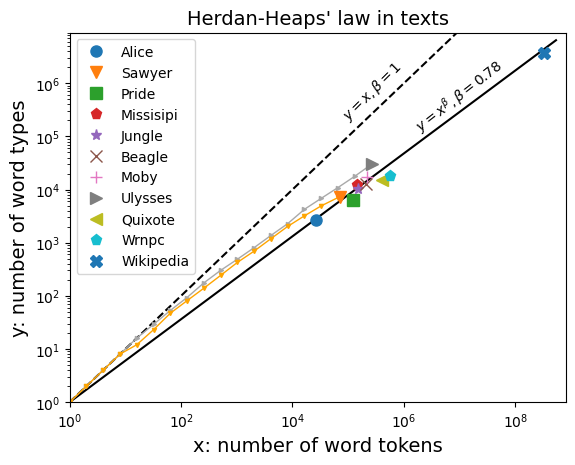

In [36]:
figure()
yscale("log")
xscale("log")
xlim(1,8*10**8)
ylim(1,9*10**6)

#datas=[aliceC,wrnpcC,beagleC,sawyerC]
#labs=["alice","wrnpc","beagle","sawyer"]


rs=[2**i for i in range(30)]
plot(rs,np.array(rs)**0.78,"-",color="Black")#,label=r"$\beta=0.78$")
plot(rs,np.array(rs)**1,"--",color="Black")#,label=r"$\beta=1$")
#plot(rs,np.array(rs)**0.5,".",color="Gray",label=r"$\beta=0.5$")

xs,ys=tokenTypeC("ulyssesC")
plot(xs,ys,"->",markersize=3,linewidth=1,color="Darkgray")

xs,ys=tokenTypeC("sawyerC")
plot(xs,ys,"-v",markersize=3,linewidth=1,color="Orange")

markers = ["o","v","s","p","*","x","+",">","<","p","X","o"]
for i in range(len(data)-1):
    d=data[i]
    plot(d[0],d[1],markers[i],label=books[i][:-1].capitalize(),markersize=8)
d=data[-1]
plot(d[0],d[1],"X",label="Wikipedia",markersize=8)

text(10**5,2*10**5,r"$y=x,\beta=1$",color="Black",rotation=45, rotation_mode='anchor')
text(2*10**6,1.2*10**5,r"$y=x^\beta,\beta=0.78$",color="Black",rotation=38, rotation_mode='anchor')


#plot(rs,C/rs,"--",color="black",label=r"Zipf's law $F_r \sim 1/r$")
title("Herdan-Heaps' law in texts",fontsize=14)
xlabel("x: number of word tokens",fontsize=14)
ylabel("y: number of word types",fontsize=14)
legend()
savefig("heaps.png",dpi=300,bbox_inches='tight')
show()

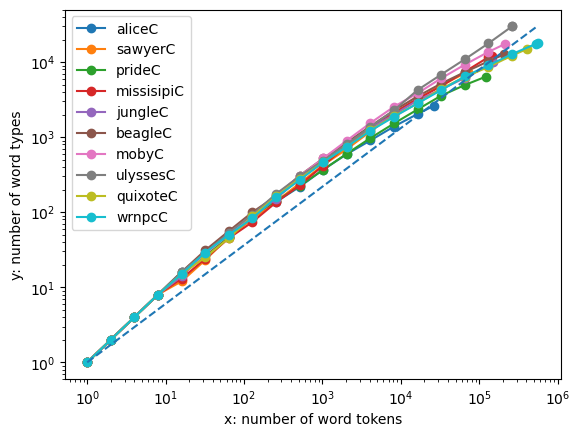

In [29]:
figure()
yscale("log")
xscale("log")
#xlim(2000,4*10**8)
#ylim(200,6*10**6)

#datas=[aliceC,wrnpcC,beagleC,sawyerC]
#labs=["alice","wrnpc","beagle","sawyer"]
for b in books:
    xs,ys=tokenTypeC(b)
    plot(xs,ys,"-o",label=b)

rs=[2**i for i in range(20)]
plot(rs,np.array(rs)**0.78,"--")
#plot(rs,C/rs,"--",color="black",label=r"Zipf's law $F_r \sim 1/r$")
xlabel("x: number of word tokens")
ylabel("y: number of word types")
legend()
show()